# Introduction to PyGMT

[GMT](https://www.generic-mapping-tools.org/) (Generic Mapping Tools) is an open-source programme for creating maps and figures. It's rooted in the Earth Sciences and so has lots of specific tools for plotting geological and geophysical mapping features, including focal mechanism beachballs, contours and topography, coastlines and geographical features. GMT is typically run on command-line, however, to increase usability a number of wrappers have been developed. Here we will look at the Python wrapper for GMT, PyGMT.

There are a number of resources which are extremely helpful to get started with PyGMT:
- [Github](https://github.com/GenericMappingTools/pygmt) for PyGMT is very well documented, including download instructions and how to create a suitable virtual environment
- [Tutorials](https://www.pygmt.org/latest/tutorials/index.html) and [Gallery](https://www.pygmt.org/latest/gallery/index.html) pages with example figures and walk-through exercises
- The [PyGMT Forum](https://forum.generic-mapping-tools.org/c/questions/pygmt-q-a/11) is monitored by the GMT steering committee, and has lots of helpful solutions provied by users
- This [EGU short course](https://github.com/GenericMappingTools/egu22pygmt) includes video lectures, exercises and sample code

And just a small note for interest, the creator of PyGMT, Paul Wessel, passed away in early 2024. Just before his passing, he published a paper on the origins of PyGMT and how it came to be today. If you're interested, it's linked below:

[Wessel, P., 2024. The origins of the generic mapping tools: From table tennis to geoscience. Perspectives of Earth and Space Scientists, 5(1), p.e2023CN000231.](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2023CN000231)

### Creating a virtual environment

In [2]:
# something here as pygmt isn't on standard distribution base(root)
import pygmt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime

### Data
In order to demonstrate some of the features of PyGMT, we will create some topgraphic maps featuring some earthquake locations. Some data has been provided in the directory `./Data`. 

- `bird.txt` is a text file which includes global tectonic plate boundary locations. It is written in a format that GMT can easily read. The dataset can be downloaded [here](http://peterbird.name/publications/2003_pb2002/2003_pb2002.htm) and the full paper citation is [Bird, P., 2003. An updated digital model of plate boundaries. Geochemistry, Geophysics, Geosystems, 4(3).](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001GC000252)
- `usgs_cat.csv` is a catalogue of regional seismicity, extracted from the USGS, for all events M > 2.5, 01/01/1990 - 13/09/2024. These can be seen on the USGS Earthquake platform [here](https://earthquake.usgs.gov/earthquakes/map/?extent=-8.10274,12.39258&extent=28.45903,68.64258&range=search&listOnlyShown=true&timeZone=utc&settings=true&search=%7B%22name%22:%22Search%20Results%22,%22params%22:%7B%22starttime%22:%221990-01-01%2000:00:00%22,%22endtime%22:%222024-09-12%2023:59:59%22,%22maxlatitude%22:22.837,%22minlatitude%22:-1.917,%22maxlongitude%22:52.031,%22minlongitude%22:29.004,%22minmagnitude%22:2.5,%22orderby%22:%22time%22%7D%7D). 
- `GVP_Holocene.csv` is a catalogue of all volcanoes, known to have erupted in the Holocene, sourced from the Global Volcanism Programme. This is a version that I have cleaned up a bit to only include certain columns of information. The raw data can be downloaded [here](https://volcano.si.edu/volcanolist_holocene.cfm).
- In `Data` there is another directory called `Corbetti`. This includes seismic event locations, a velocity model and some focal mechanism information for some selected events around Corbetti volcano, Ethiopia. There is a README file in the directory which explains the data format. The data can be accessed [here](https://www.data.gov.uk/dataset/185370a7-c688-4932-b2e2-fa12a4b55d72/seismic-catalog-for-corbetti-volcano-ethiopia-nerc-grant-ne-l013932-1) and is presented in [Lavayssière, A., Greenfield, T., Keir, D., Ayele, A. and Kendall, J.M., 2019. Local seismicity near the actively deforming Corbetti volcano in the Main Ethiopian Rift. Journal of Volcanology and Geothermal Research, 381, pp.227-237.](https://www.sciencedirect.com/science/article/pii/S0377027319301684?via%3Dihub) 

The majority of the figures in Lavayssière et al., 2019 are produced using PyGMT. We are going to attempt some of these, starting with a simple map and progressively adding features. 

### A simple map

We always initiate a figure by calling `pygmt.Figure()` and present the figure at the end with `show()`. Any features on our map, are added with specific PyGMT functions, and we can customise these using the keyword arguments (kwargs). 

In this case, to plot a simple 2D map, we call `fig.coast`. If you are familiar with GMT, you will recognise that lots of the functions are similar to the GMT commands (eg. `ps coast`). The old style GMT flags, are now incorporated as function kwargs, and they are explained in the function [documentation](https://www.pygmt.org/dev/api/generated/pygmt.Figure.coast.html).

There are some mandatory arguments, in the coast function. We must define our map boundaries, as the minomum and maximum longitudes and latitudes of the map extent, and the map projection we wish to use. In this case, `M12c` means a Mercator projection, with a figure size of 12cm. As we are plotting very close to the equator, this is a region where projection distortion isn't so important, but PyGMT provides a variety of map projection options for larger areas or areas close to the poles. 

We can then add simple kwargs to colour the sea, land and add a black solid line to mark out the shorelines.



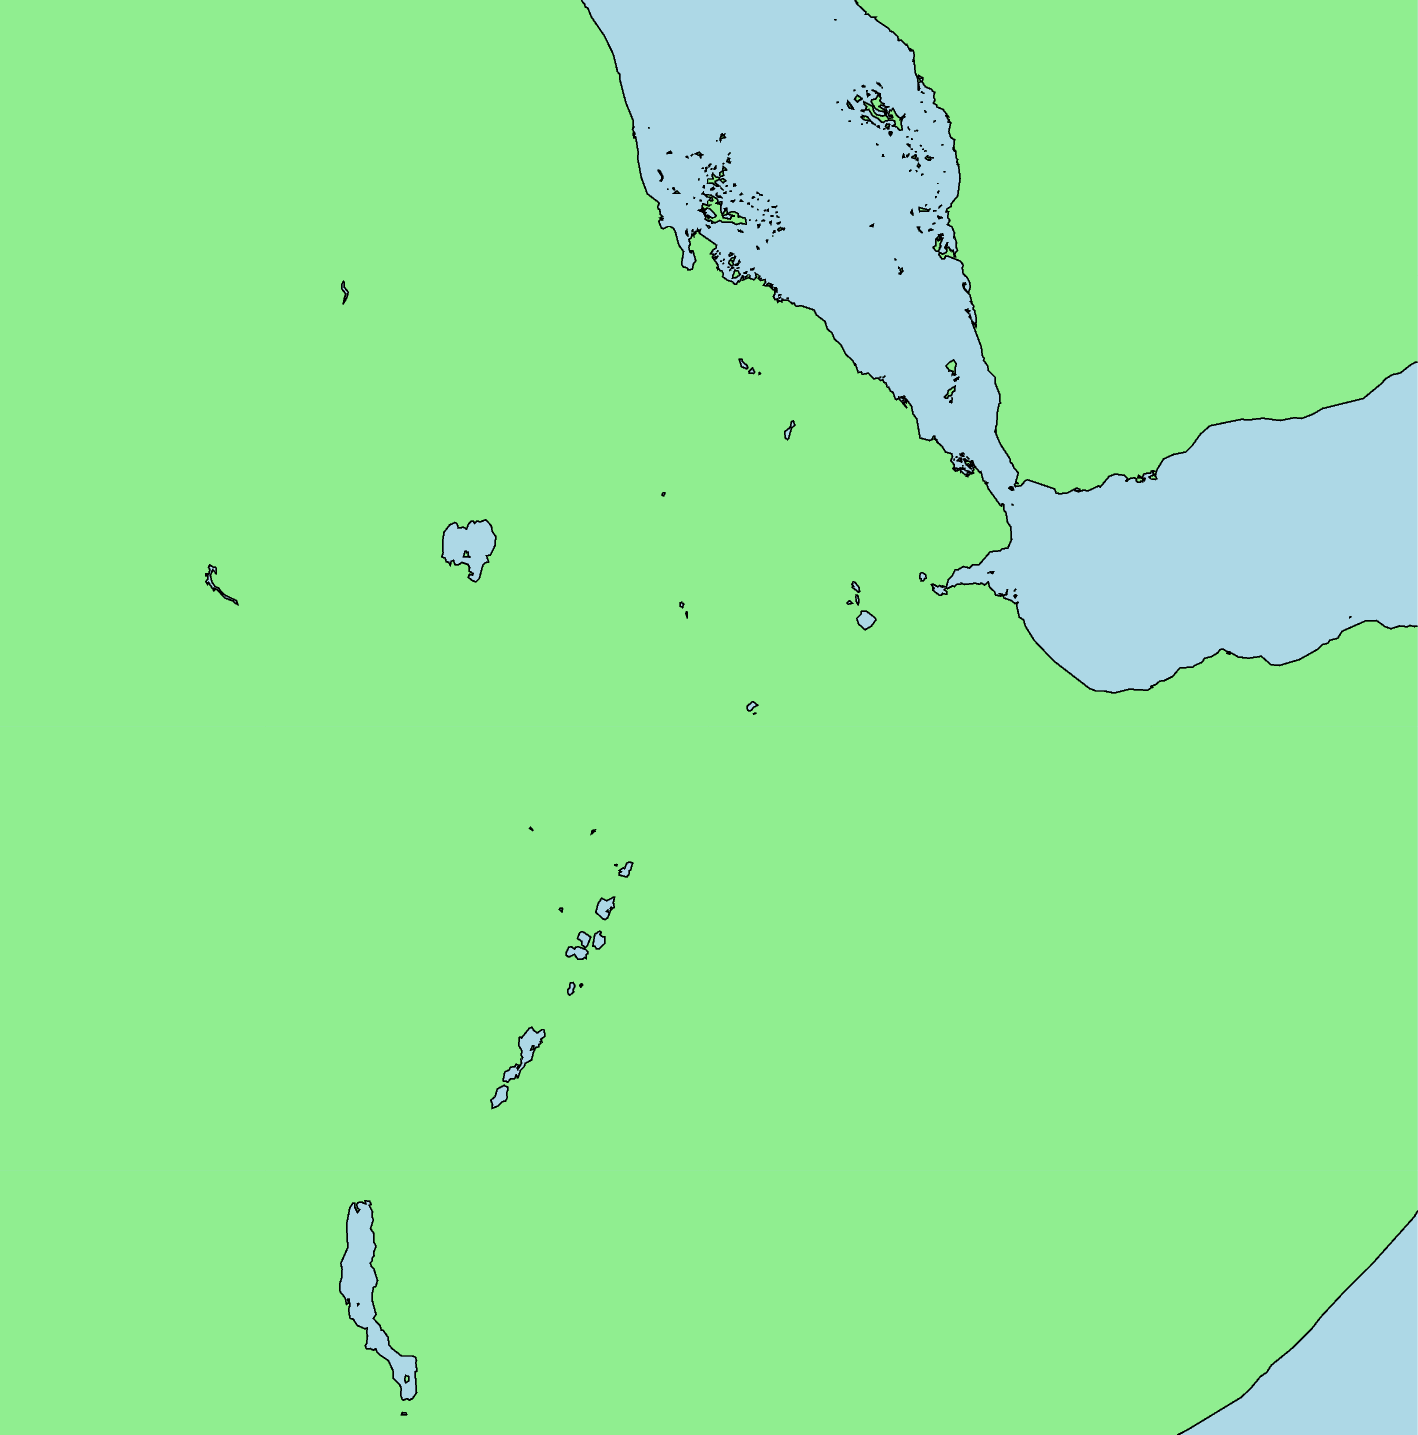

In [4]:
fig = pygmt.Figure()
fig.coast(region=[32,48,2,18], projection="M12c", land="lightgreen", water="lightblue", shorelines=True) 
fig.show()

We are likely going to need those parameters for regional extent, and projection to use in further PyGMT commands. It's good habit to make these their own variables at the very top of the script, so that if we need to change them, we can do it just once rather than in every function. 

In [ ]:
latmin = 2
latmax = 18
lonmin = 32
lonmax = 48

proj = "M12c"

fig = pygmt.Figure()
fig.coast(region=[lonmin,lonmax,latmin,latmax], projection=proj, land="lightgreen", water="lightblue", shorelines=True)
fig.show()

We can now add some features to make this map more useful. We can add a frame to our map. Frame is set using <u>**a**</u>nnotations, <u>**f**</u>rame and <u>**g**</u>ridlines. In this case, we want a label annotation every 2 degrees, a tick mark every 1 degree and no grid lines. You can play around with customising these. 

We can use `pygmt.config` to make some aesthetic tweaks. Comment each one out and see what changes. 

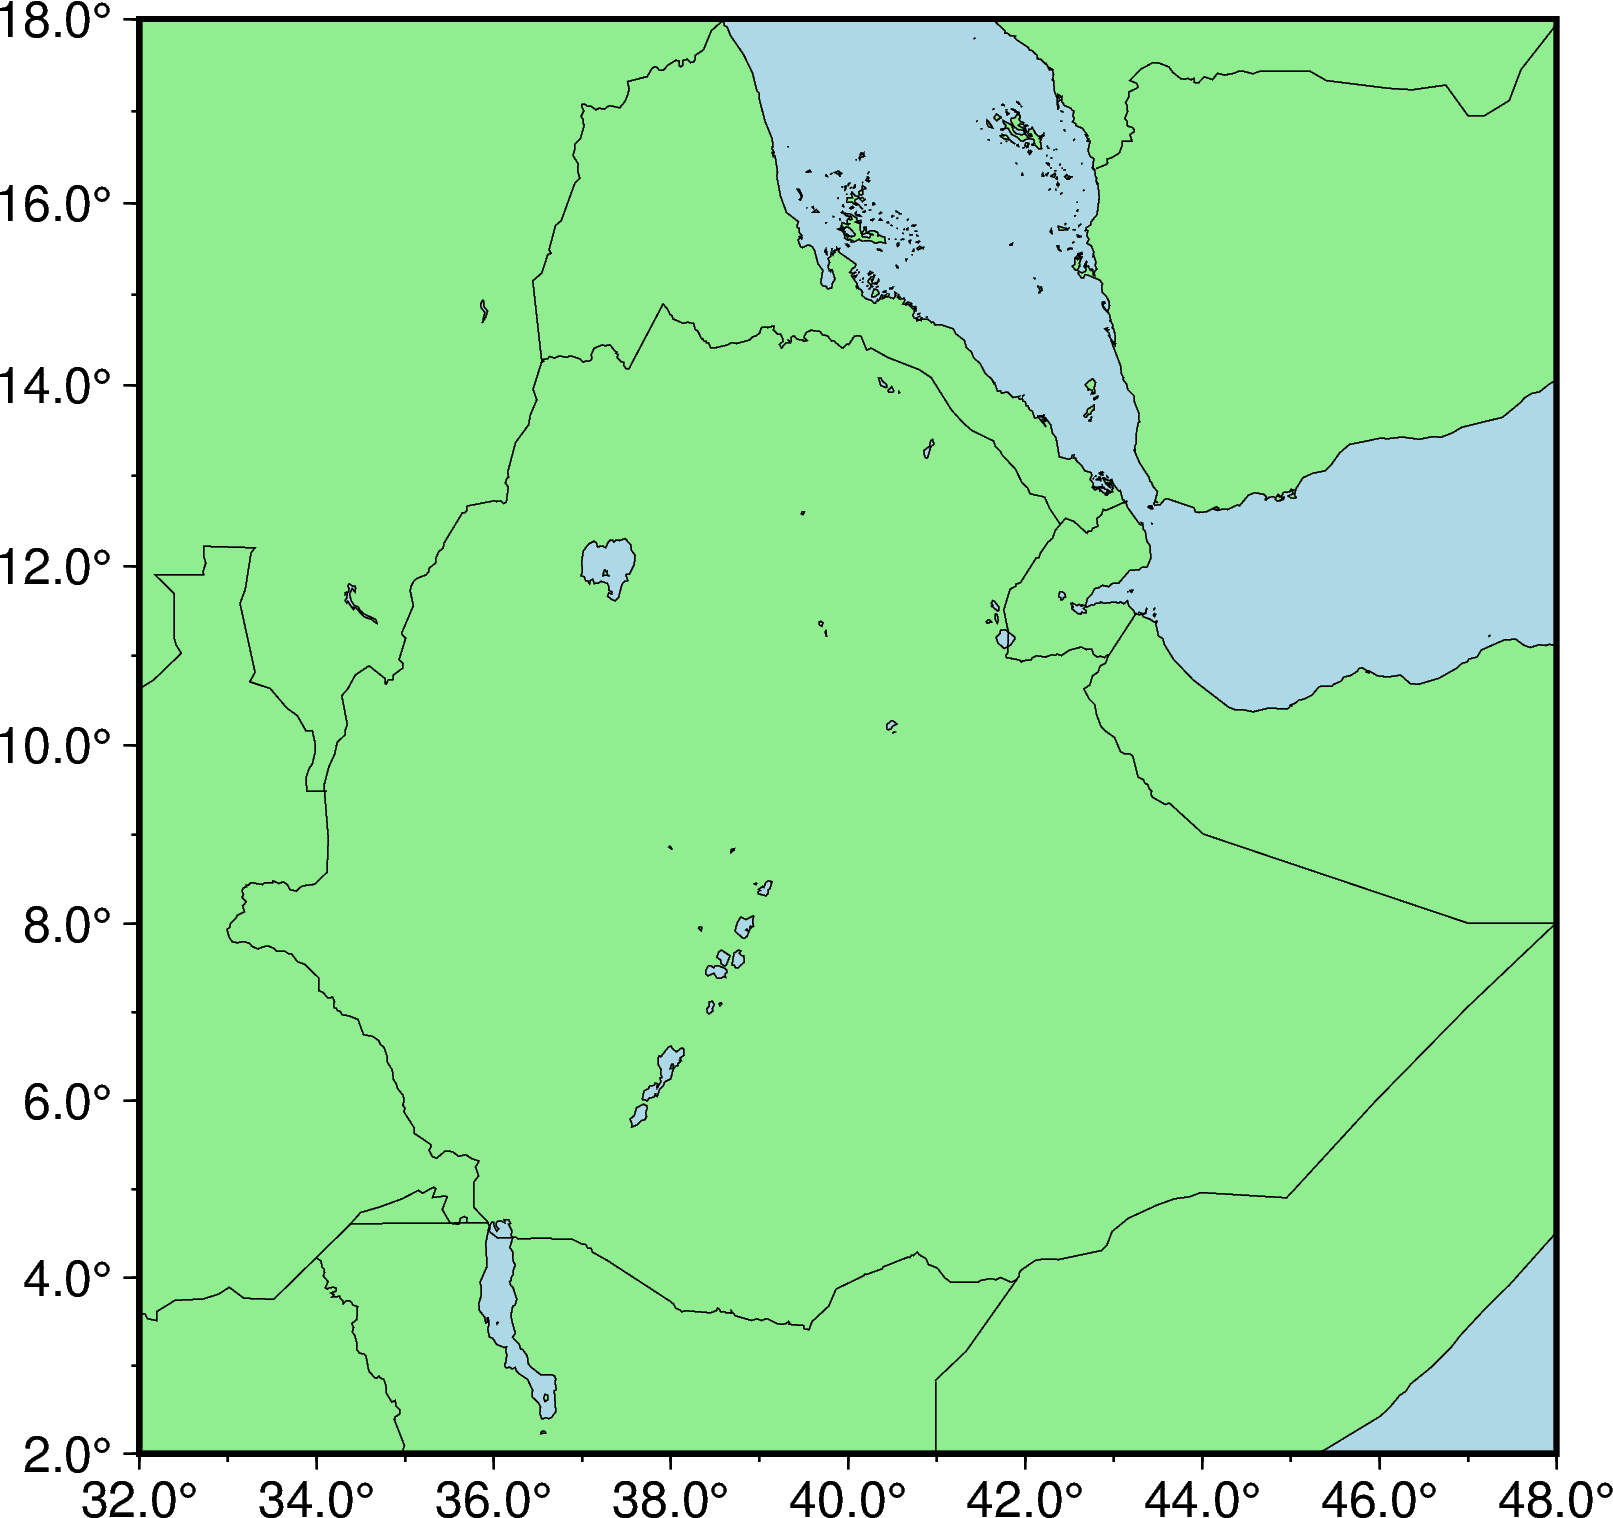

In [6]:
latmin = 2
latmax = 18
lonmin = 32
lonmax = 48

proj = "M12c"

frame = "a2.0f1.0" # Like proj, and the lon/lat, set the frame variable up top. 

fig = pygmt.Figure()

pygmt.config(FONT_ANNOT_PRIMARY="12p", FONT_TITLE='12p')
pygmt.config(FORMAT_GEO_MAP="ddd.x")
pygmt.config(MAP_FRAME_TYPE="plain")

fig.coast(region=[lonmin,lonmax,latmin,latmax], projection=proj, frame=frame, land="lightgreen", water="lightblue", shorelines=True, borders=1)  # Pass region to the first plot element


fig.show()    


### Adding information to our map

We can briefly look here at the format of our different data sets and add them to our map. The tectonic plate boundary data is pre-formatted for GMT so we can simply plot that as a line. 

In [7]:
eq_data = pd.read_csv('./Data/usgs_cat.csv')
eq_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-09-12T07:39:54.375Z,17.9540,40.0457,10.0,4.9,mb,71.0,112.0,13.897,0.96,...,2024-09-12T08:25:05.040Z,"226 km WSW of Bariq, Saudi Arabia",earthquake,11.91,1.922,0.070,64.0,reviewed,us,us
1,2024-09-12T07:39:28.240Z,17.4104,39.8345,10.0,4.4,mb,44.0,263.0,14.364,0.97,...,2024-09-12T08:27:39.040Z,"203 km N of Massawa, Eritrea",earthquake,17.83,2.010,0.087,38.0,reviewed,us,us
2,2024-09-12T06:46:13.539Z,17.9099,40.0717,10.0,4.9,mb,54.0,109.0,13.946,0.83,...,2024-09-12T07:24:56.040Z,"226 km WSW of Bariq, Saudi Arabia",earthquake,13.23,1.926,0.093,36.0,reviewed,us,us
3,2024-09-12T06:20:56.529Z,17.7435,40.1262,10.0,4.7,mb,45.0,187.0,14.120,0.96,...,2024-09-12T06:42:42.040Z,"225 km W of Ad Darb, Saudi Arabia",earthquake,13.66,1.951,0.096,33.0,reviewed,us,us
4,2024-08-12T04:37:00.038Z,13.2568,49.6298,10.0,4.0,mb,19.0,142.0,6.845,0.46,...,2024-09-12T01:51:29.040Z,"152 km SSE of Mukalla, Yemen",earthquake,15.19,1.951,0.173,9.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,1990-03-04T23:09:01.470Z,13.3290,50.3610,10.0,4.7,mb,NaN,NaN,NaN,1.30,...,2014-11-07T00:45:52.721Z,"156 km NNW of Caluula, Somalia",earthquake,NaN,NaN,NaN,8.0,reviewed,us,us
1827,1990-03-04T21:02:32.620Z,12.9870,50.5550,10.0,4.8,mb,NaN,NaN,NaN,1.30,...,2014-11-07T00:45:52.706Z,"115 km N of Caluula, Somalia",earthquake,NaN,NaN,NaN,12.0,reviewed,us,us
1828,1990-01-24T22:24:22.070Z,11.9330,43.4300,26.8,3.9,ml,NaN,NaN,NaN,0.20,...,2014-11-07T00:45:35.564Z,"15 km ESE of Obock, Djibouti",earthquake,NaN,6.200,NaN,NaN,reviewed,us,aro
1829,1990-01-24T16:35:17.410Z,11.8830,43.2680,10.0,4.2,ml,NaN,NaN,NaN,0.60,...,2014-11-07T00:45:35.510Z,"9 km SSW of Obock, Djibouti",earthquake,NaN,NaN,NaN,NaN,reviewed,us,aro


In [8]:
volc_data = pd.read_csv('./Data/GVP_Holocene.csv')
volc_data

,id,name,date,lat,lon,elev
0,210010,West Eifel Volcanic Field,8300 BCE,50.1700,6.8500,600
1,210020,Chaine des Puys,4040 BCE,45.7860,2.9810,1464
2,210030,Olot Volcanic Field,Unknown,42.1700,2.5300,893
3,210040,Calatrava Volcanic Field,3600 BCE,38.8700,-4.0200,1117
4,211004,Colli Albani,Unknown,41.7569,12.7251,949
...,...,...,...,...,...,...
1278,390120,Leskov Island,Unknown,-56.6560,-28.1400,190
1279,390130,Zavodovski,2016 CE,-56.3000,-27.5700,551
1280,390140,Protector Seamounts,1962 CE,-55.9120,-28.1670,-55
1281,390829,Mount Haddington Volcanic Field,Unknown,-64.1500,-57.7500,1630


We can use pandas and the column titles to extract the information that we want to plot. The colours of the markers are controlled by style, pen and fill and there are [14 different simple symbols](https://www.pygmt.org/dev/gallery/symbols/basic_symbols.html) that can be used for x/y plotting.

plot [WARNING]: Representation of pen color (\040black) not recognized. Using default.
plot [ERROR]: Pen attributes not using just - and . for dashes and dots. Offending character --> \
plot [WARNING]: Representation of pen style (\040-) not recognized. Using default.


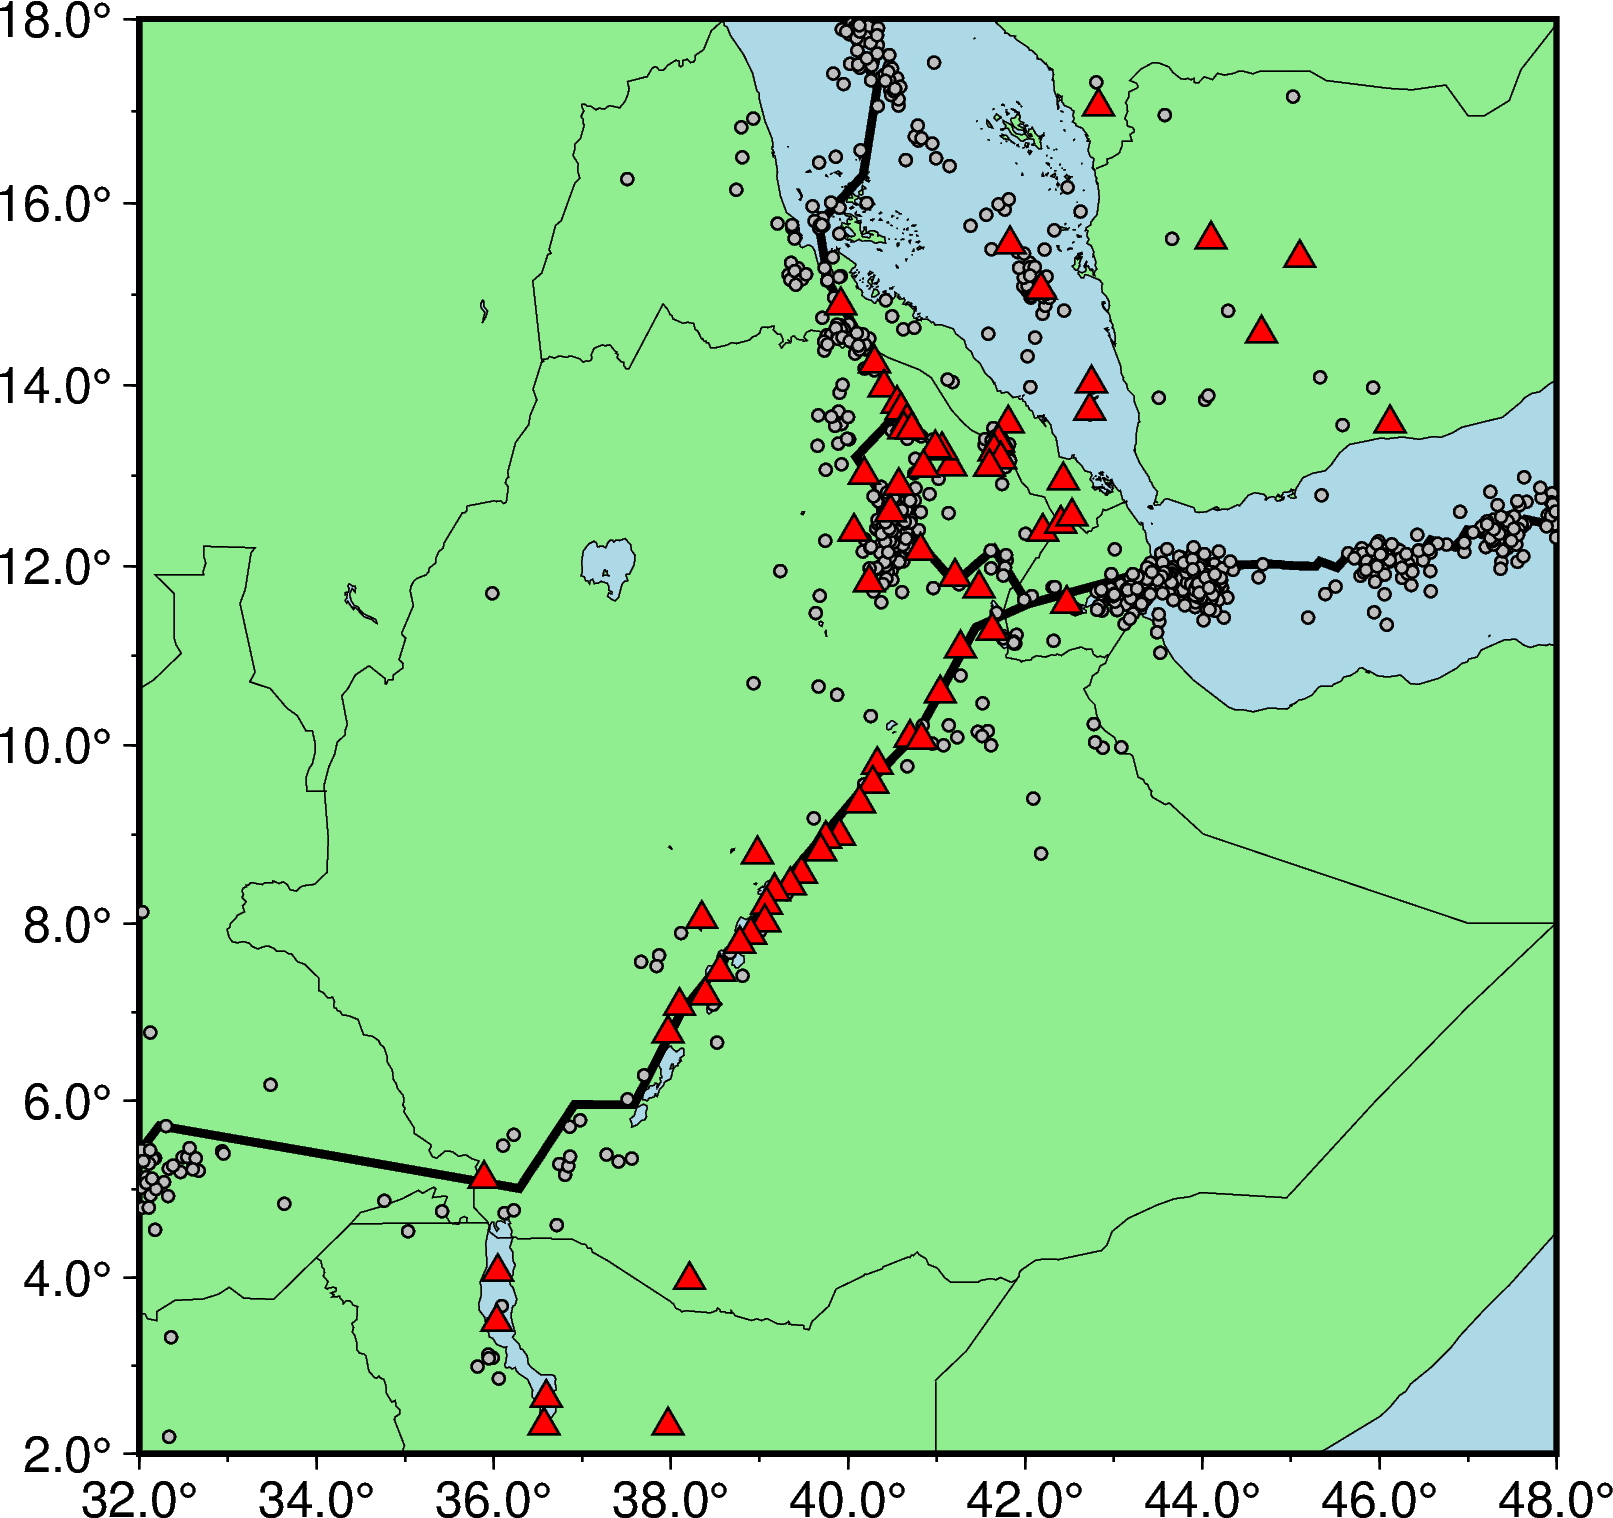

In [10]:
fig = pygmt.Figure()

pygmt.config(FONT_ANNOT_PRIMARY="12p", FONT_TITLE='12p')
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")

fig.coast(region=[lonmin,lonmax,latmin,latmax], projection=proj, frame=frame, land="lightgreen", water="lightblue", shorelines=True, borders=1)

# Add Bird (2003) plate boundaries
bird_data = "./Data/bird_symbols.txt"
fig.plot(data=bird_data, pen='2p, black, -', projection=proj, region=[lonmin,lonmax,latmin,latmax])

#Add usgs earthquake data
eq_data = pd.read_csv('./Data/usgs_cat.csv')
fig.plot(x=eq_data.longitude, y=eq_data.latitude, style='c0.1c', pen='0.5p,black', fill='gray', projection=proj)

# Add GVP Holocene volcanoes
volc_data = pd.read_csv('./Data/GVP_Holocene.csv')
fig.plot(x=volc_data.lon, y=volc_data.lat, style='t0.3c', pen='0.5p,black', fill='red', projection=proj)

fig.show()
    

### Adding details

Let's focus only on the earthquake data. We can scale our points in size according to the earthquake magnitude, and colour them by the time that they occurred.

Python date time formats can be incompatible if you're not careful, and PyGMT uses a numpy64 datetime format. To avoid any complications, we will add an extra column to our pandas dataframe, where we convert the datetime into a floating point number (decimal days). We can then make a colour palette using `makecpt` which represents the range of our data.

plot [WARNING]: Representation of pen color (\040black) not recognized. Using default.
plot [ERROR]: Pen attributes not using just - and . for dashes and dots. Offending character --> \
plot [WARNING]: Representation of pen style (\040-) not recognized. Using default.


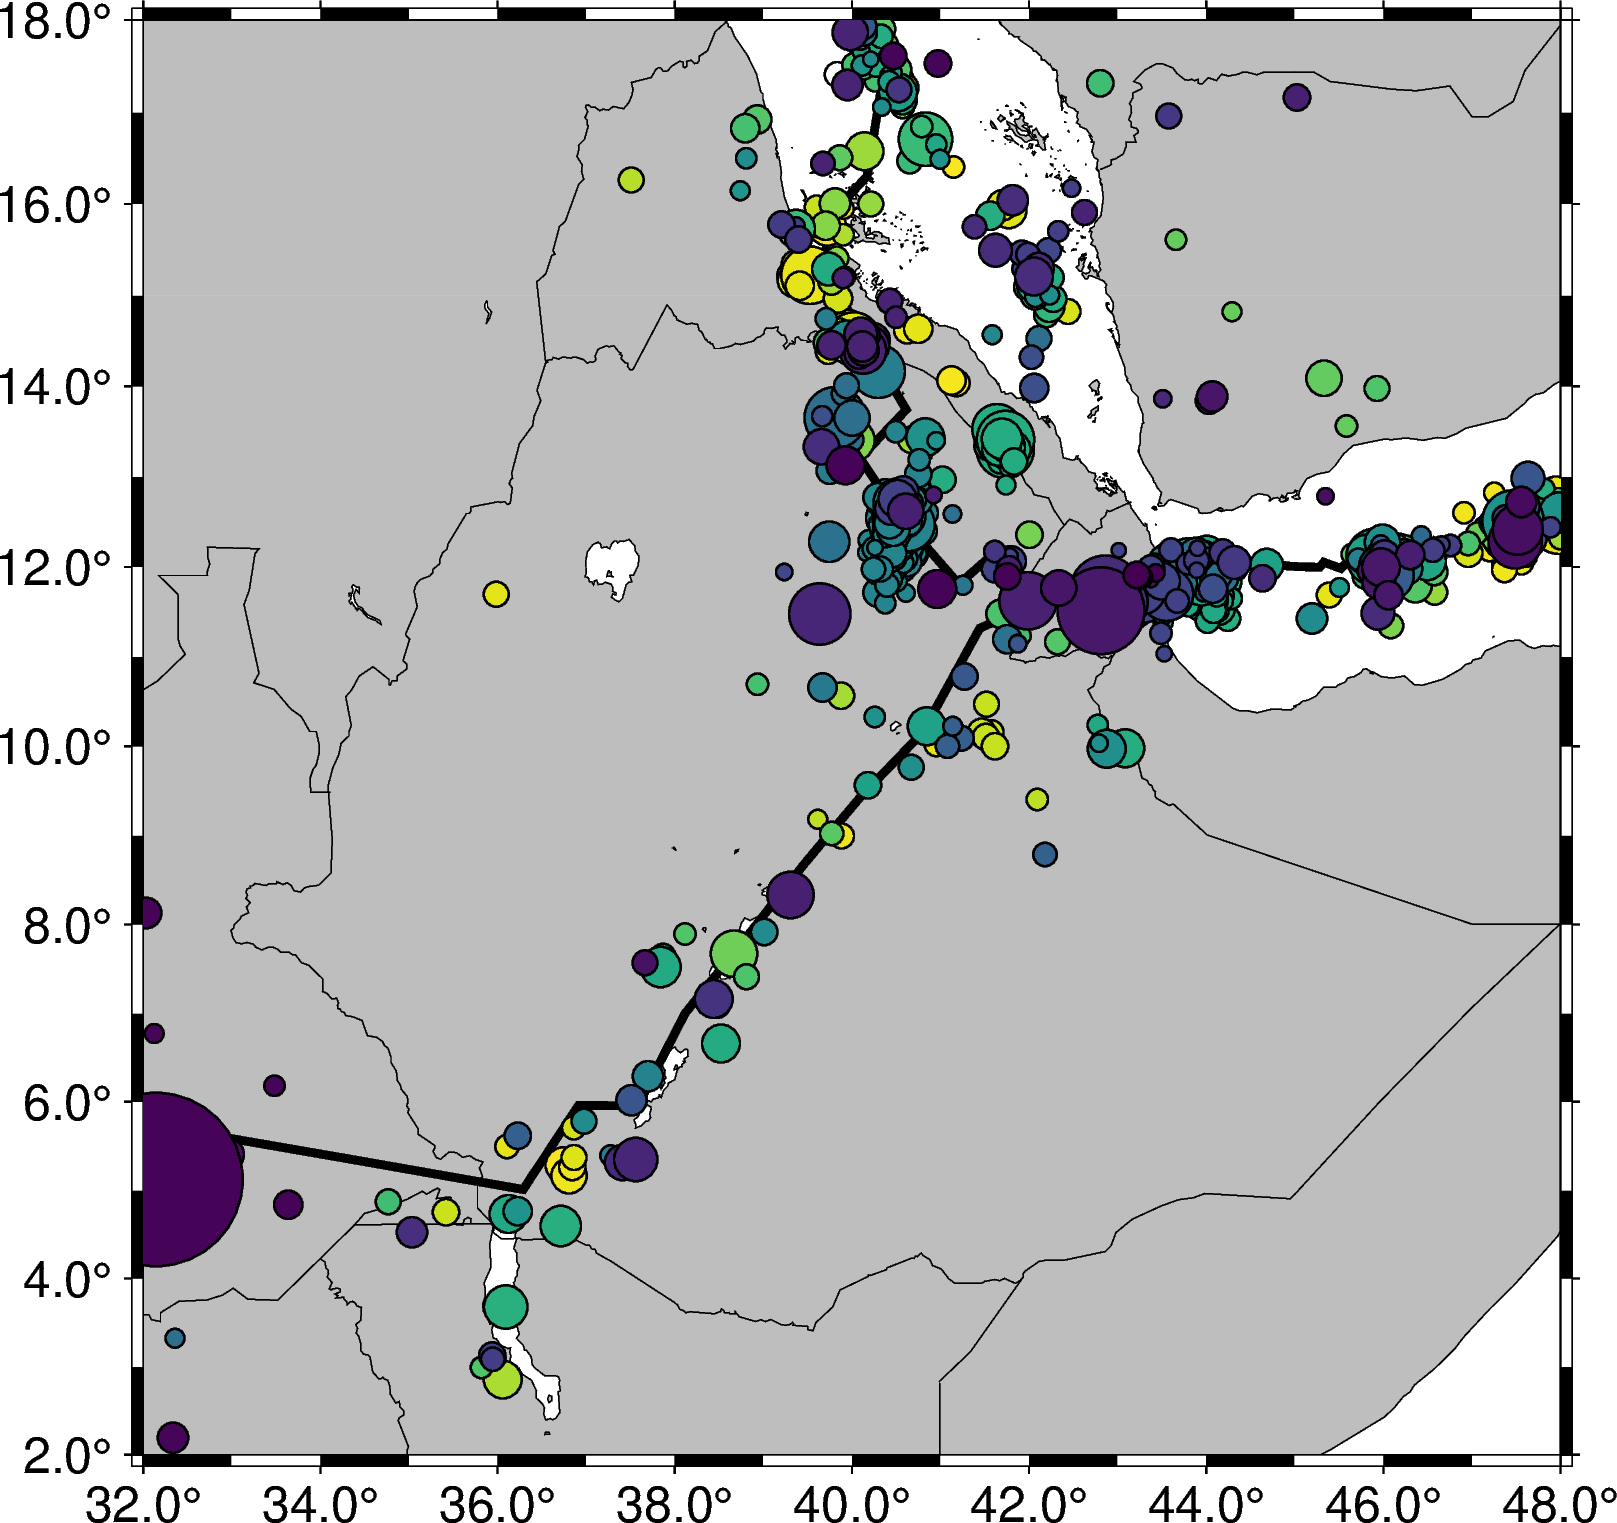

In [13]:
#Augment the EQ data. If you want to plot by datetime feature, must convert dt
eq_data = pd.read_csv('./Data/usgs_cat.csv')
eq_data['datetime_numeric'] = mdates.date2num(eq_data['time'])

#Initiate figure
fig = pygmt.Figure()

# Set some plot configuration things
pygmt.config(FONT_ANNOT_PRIMARY="12p", FONT_TITLE='12p')
pygmt.config(FORMAT_GEO_MAP="ddd.x")#, MAP_FRAME_TYPE="plain")

# First draw the solid colors - change colours to not clash with palette
fig.coast(region=[lonmin,lonmax,latmin,latmax], projection=proj, frame=frame, land="gray", water="white", shorelines=True, borders=1)  

# Add Bird (2003) plate boundaries
bird_data = "./Data/bird_symbols.txt"
fig.plot(data=bird_data, pen='2p, black, -', projection=proj, region=[lonmin,lonmax,latmin,latmax])

pygmt.makecpt(cmap="viridis", series=[eq_data['datetime_numeric'].min(), eq_data['datetime_numeric'].max(), "1d"])
fig.plot(x=eq_data.longitude, y=eq_data.latitude, style='cc', size=0.01*(2**eq_data.mag), pen='0.5p,black', cmap=True, fill=eq_data['datetime_numeric'], projection=proj)
     
fig.show()

We can add a few more details to really finish this map. We have set up the map using `coast` but there are a few more features we can unlock using `basemap`. 
* We can add a title to the map, in the frame argument.
* We can also add a map scale. The string for the map scale argument can be broken down like so:
    * 6.0/-3.0c indicates the x/y position of the scale bar within the map frame axis, and the c means to work in centimetres. If 0/0 is bottom left, 6.0/-3.0c will plot 6 cm from the left and -3 cm below the map
    * w500k will make a scale bar of 500 kilometres
    * +f adds the annotations next to the scale bar
    * +u will show the units

Finally, we can also add a colour bar. However, because we have converted the time into decimal days, if we add ticks and labels automatically to the colour bar (using something like `frame=af`), they will appear as numbers. There are a few hacks around this. Here we set the annotations to be a very large number, and the frame to 3650, so there is a tick every 10 years. We can then add 10 year labels in the axis labels. 

This is an ugly fix, but it works. ChatGPT provided an even clunkier solution. There is a discussion on the [PyGMT forum](https://forum.generic-mapping-tools.org/t/color-by-datetime-in-plot/2409) where some users have managed to work colour bar annotations with compatible date time formats.  

plot [WARNING]: Representation of pen color (\040black) not recognized. Using default.
plot [ERROR]: Pen attributes not using just - and . for dashes and dots. Offending character --> \
plot [WARNING]: Representation of pen style (\040-) not recognized. Using default.
plot [WARNING]: Cannot use auto-legend -l for variable symbol color. Option -l ignored.
basemap [WARNING]: Your -L option was interpreted to mean -Lx
legend [WARNING]: File <stdin> is empty!


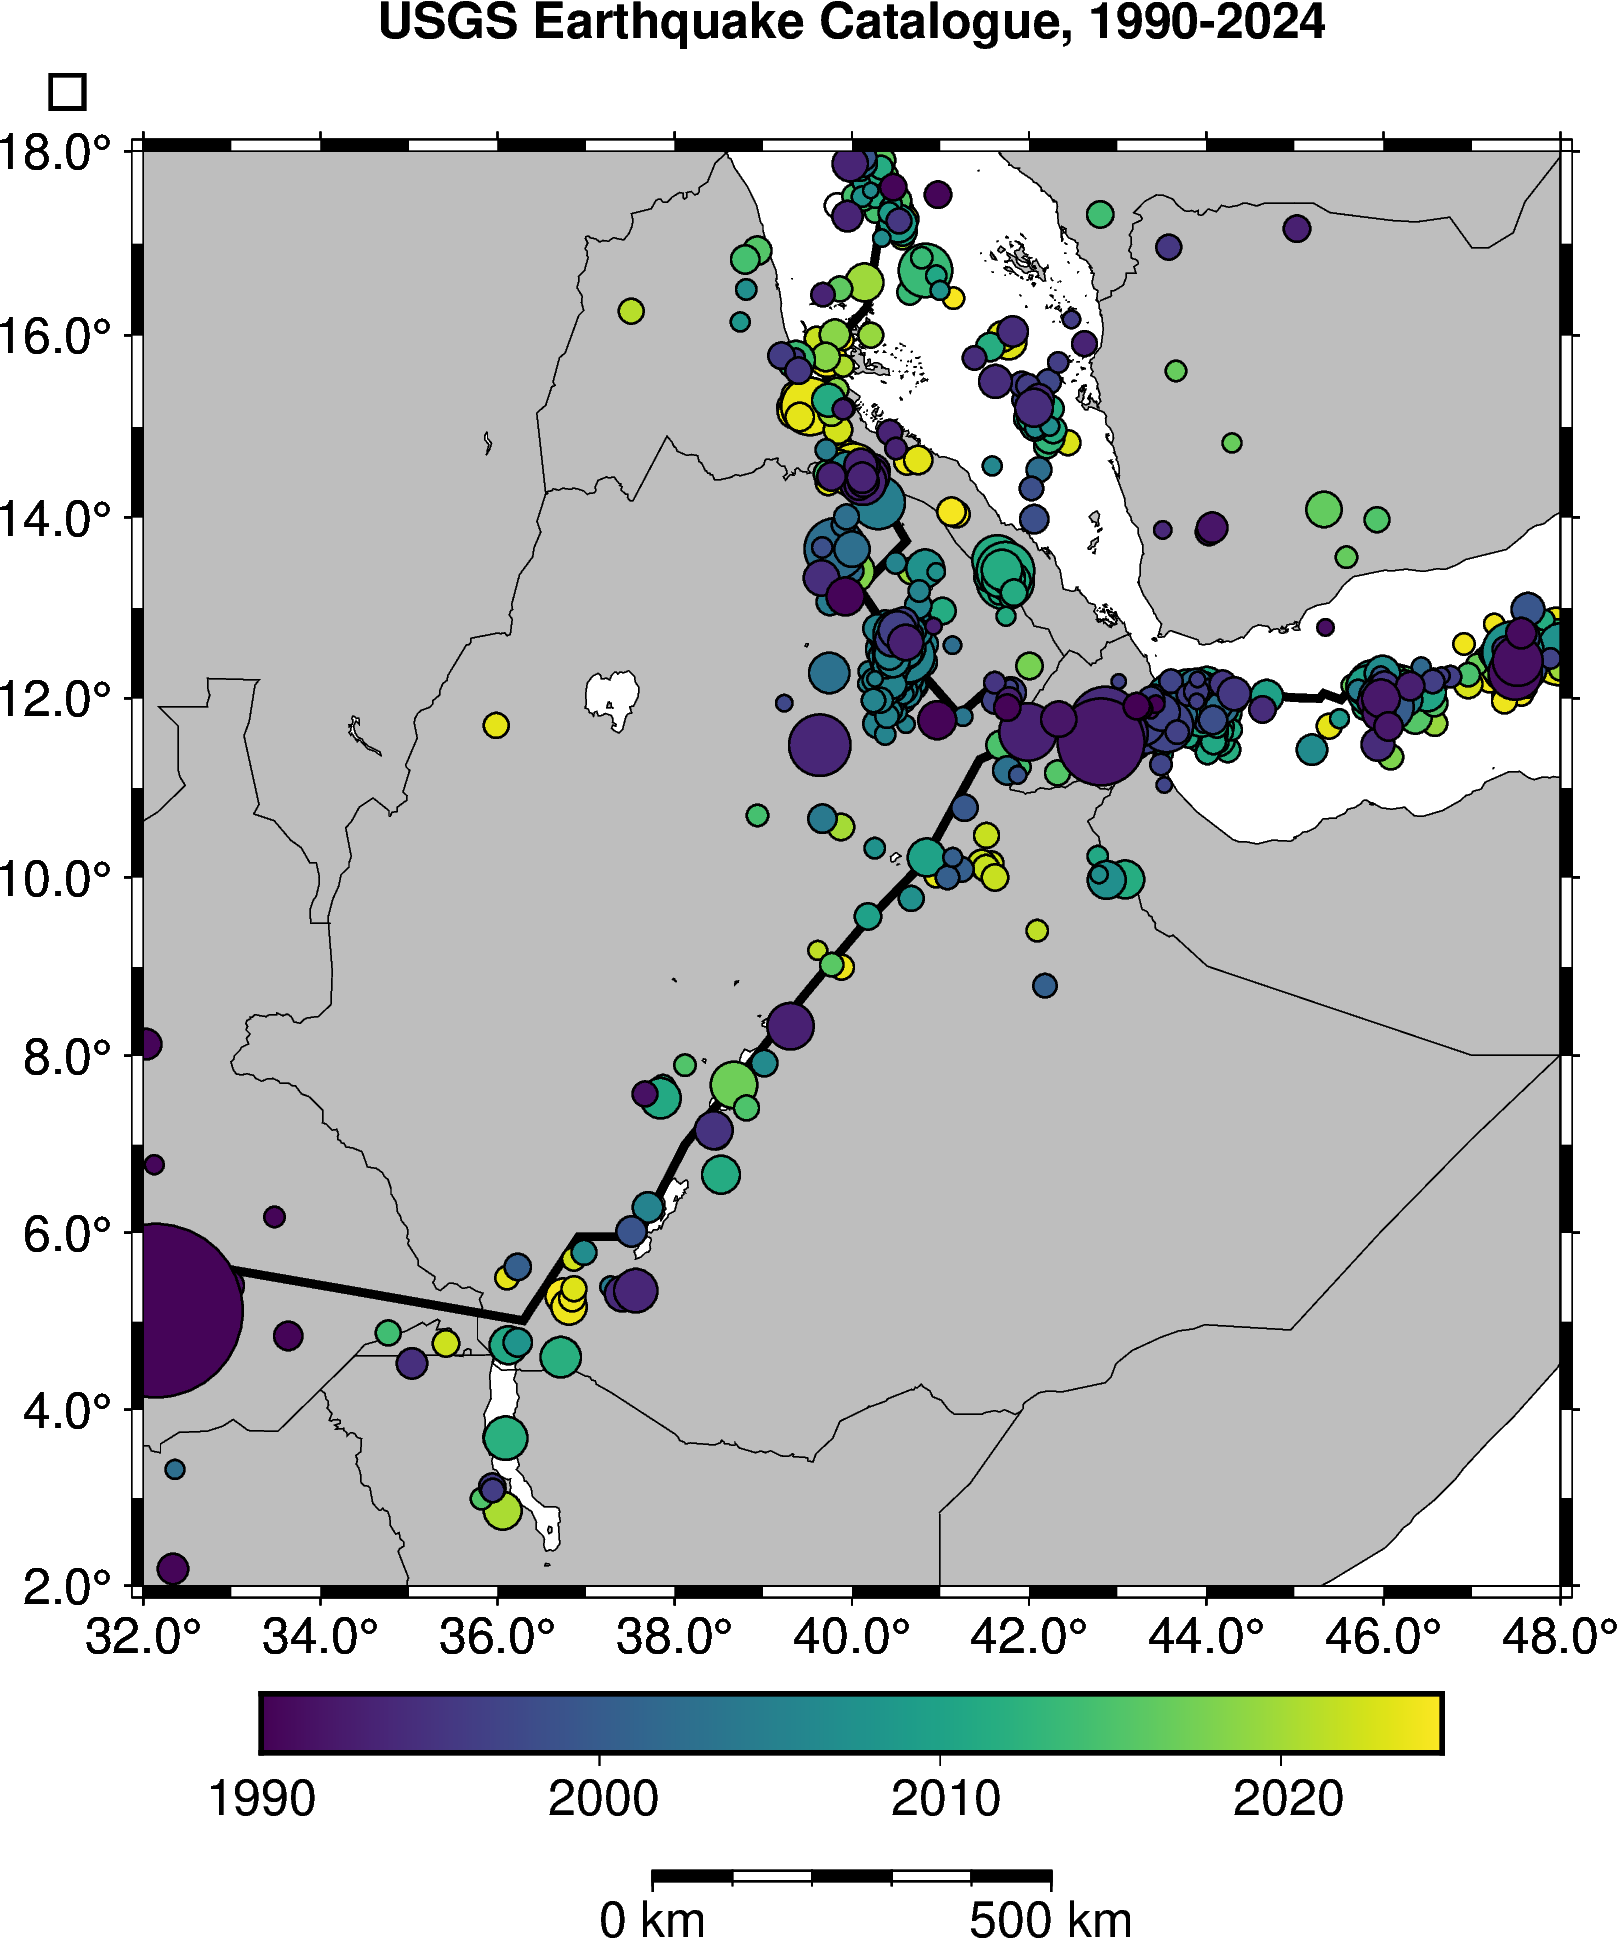

In [56]:
# Add to our parameters up top - title string
titlestr = "USGS Earthquake Catalogue, 1990-2024"
title = "+t\""+titlestr+"\""

#Initiate figure
fig = pygmt.Figure()

# Set some plot configuration things
pygmt.config(FONT_ANNOT_PRIMARY="12p", FONT_TITLE='12p')
pygmt.config(FORMAT_GEO_MAP="ddd.x")#, MAP_FRAME_TYPE="plain")

# First draw the solid colors
fig.coast(region=[lonmin,lonmax,latmin,latmax], projection=proj, frame=frame, land="gray", water="white", shorelines=True, borders=1)  

# Add Bird (2003) plate boundaries
bird_data = "./Data/bird_symbols.txt"
fig.plot(data=bird_data, pen='2p, black, -', projection=proj, region=[lonmin,lonmax,latmin,latmax])

pygmt.makecpt(cmap="viridis", series=[eq_data['datetime_numeric'].min(), eq_data['datetime_numeric'].max(), "1d"])
fig.plot(x=eq_data.longitude, y=eq_data.latitude, style='cc', size=0.01*(2**eq_data.mag), pen='0.5p,black', cmap=True, fill=eq_data['datetime_numeric'], projection=proj)

# Set basemap
fig.basemap(region=[lonmin,lonmax,latmin,latmax], projection=proj, frame=[frame, title], map_scale='6.0/-2.5c+w500k+f+u')

# Add a colorbar below the plot, format it as datetime
fig.colorbar(
    frame=["a365000000f3650"],
    position="JBC+w10c/0.5c+h",  # Position: centered below map, horizontal colorbar, 10 cm wide
    scale=1
)

# Now we know we have ticks every 10 years, manually add labels
fig.text(text='1990', x=1.0, y=-1.8, no_clip=True, region=[0,12,0,12], frame=None)
fig.text(text='2000', x=3.9, y=-1.8, no_clip=True, region=[0,12,0,12], frame=None)
fig.text(text='2010', x=6.8, y=-1.8, no_clip=True, region=[0,12,0,12], frame=None)
fig.text(text='2020', x=9.7, y=-1.8, no_clip=True, region=[0,12,0,12], frame=None)

# fig.colorbar(frame="af",position="JBC+w10c/0.5c+h", scale=1)     # uncomment this to see the automatic tick labelling

fig.show()

Finally, we can also add a legend to show how the size of the points scale. For simple plots, there is an auto-legend feature, so that any plot element with a kwarg `label` will be included in a legend when `fig.legend()` is called. This will be automatically placed on the map, where PyGMT thinks is best, using default settings. 

I this case, we would like a scale which shows magnitudes at discrete intervals (eg. Magnitude 3, 4, 5 etc.). The simplest way to do this is to prepare a .txt file in GMT format to pass to the legend function. This is known as a specfile. The format for the specfile (legend.txt) is described in the [GMT documentation](https://docs.generic-mapping-tools.org/latest/legend.html). 

* N 5 states that we want 5 columns in our legend
* Each line starting with S is a new symbol in our legend
    * Column 2 (0.0c) is the distance between the start of the column and the plot point, and unit
    * Column 3 (c) is the shape of the symbol
    * Column 4 (0.08c) is the size of the symbol and unit (see below for calculation)
    * Column 5 (black) is the symbol fill colour
    * Column 6 (0.5p) is rhe symbol pen weight (and you can add a different colour here if wanted, separated by comma)
    * Column 7 (0.5c) is the space between the plot point and the label text starting. We keep this the same, but increase for the biggest symbol to account for its size.
    * Column 8 (M3.0) is the text label for the legend
 
In the PyGMT code, we have scaled the plot points using `size=0.01*(2**eq_data.mag)` and specified the unit is cm. We can calculate the plot point sizes for column 4 of the legend using a simple loop

In [59]:
mags = [3, 4, 5, 6, 7] # the discrete mags we want in our legend
for mag in mags:
    print('Mag', mag, "=", 0.01*(2**mag), "cm")


Mag 3 = 0.08 cm
Mag 4 = 0.16 cm
Mag 5 = 0.32 cm
Mag 6 = 0.64 cm
Mag 7 = 1.28 cm


Better still, we can write our spec file in the script, so that if we change our scaling for any reason the specfile will automatically update and so will the legend.

plot [WARNING]: Representation of pen color (\040black) not recognized. Using default.
plot [ERROR]: Pen attributes not using just - and . for dashes and dots. Offending character --> \
plot [WARNING]: Representation of pen style (\040-) not recognized. Using default.
basemap [WARNING]: Your -L option was interpreted to mean -Lx
legend [WARNING]: Your -D option was interpreted to mean -Dx


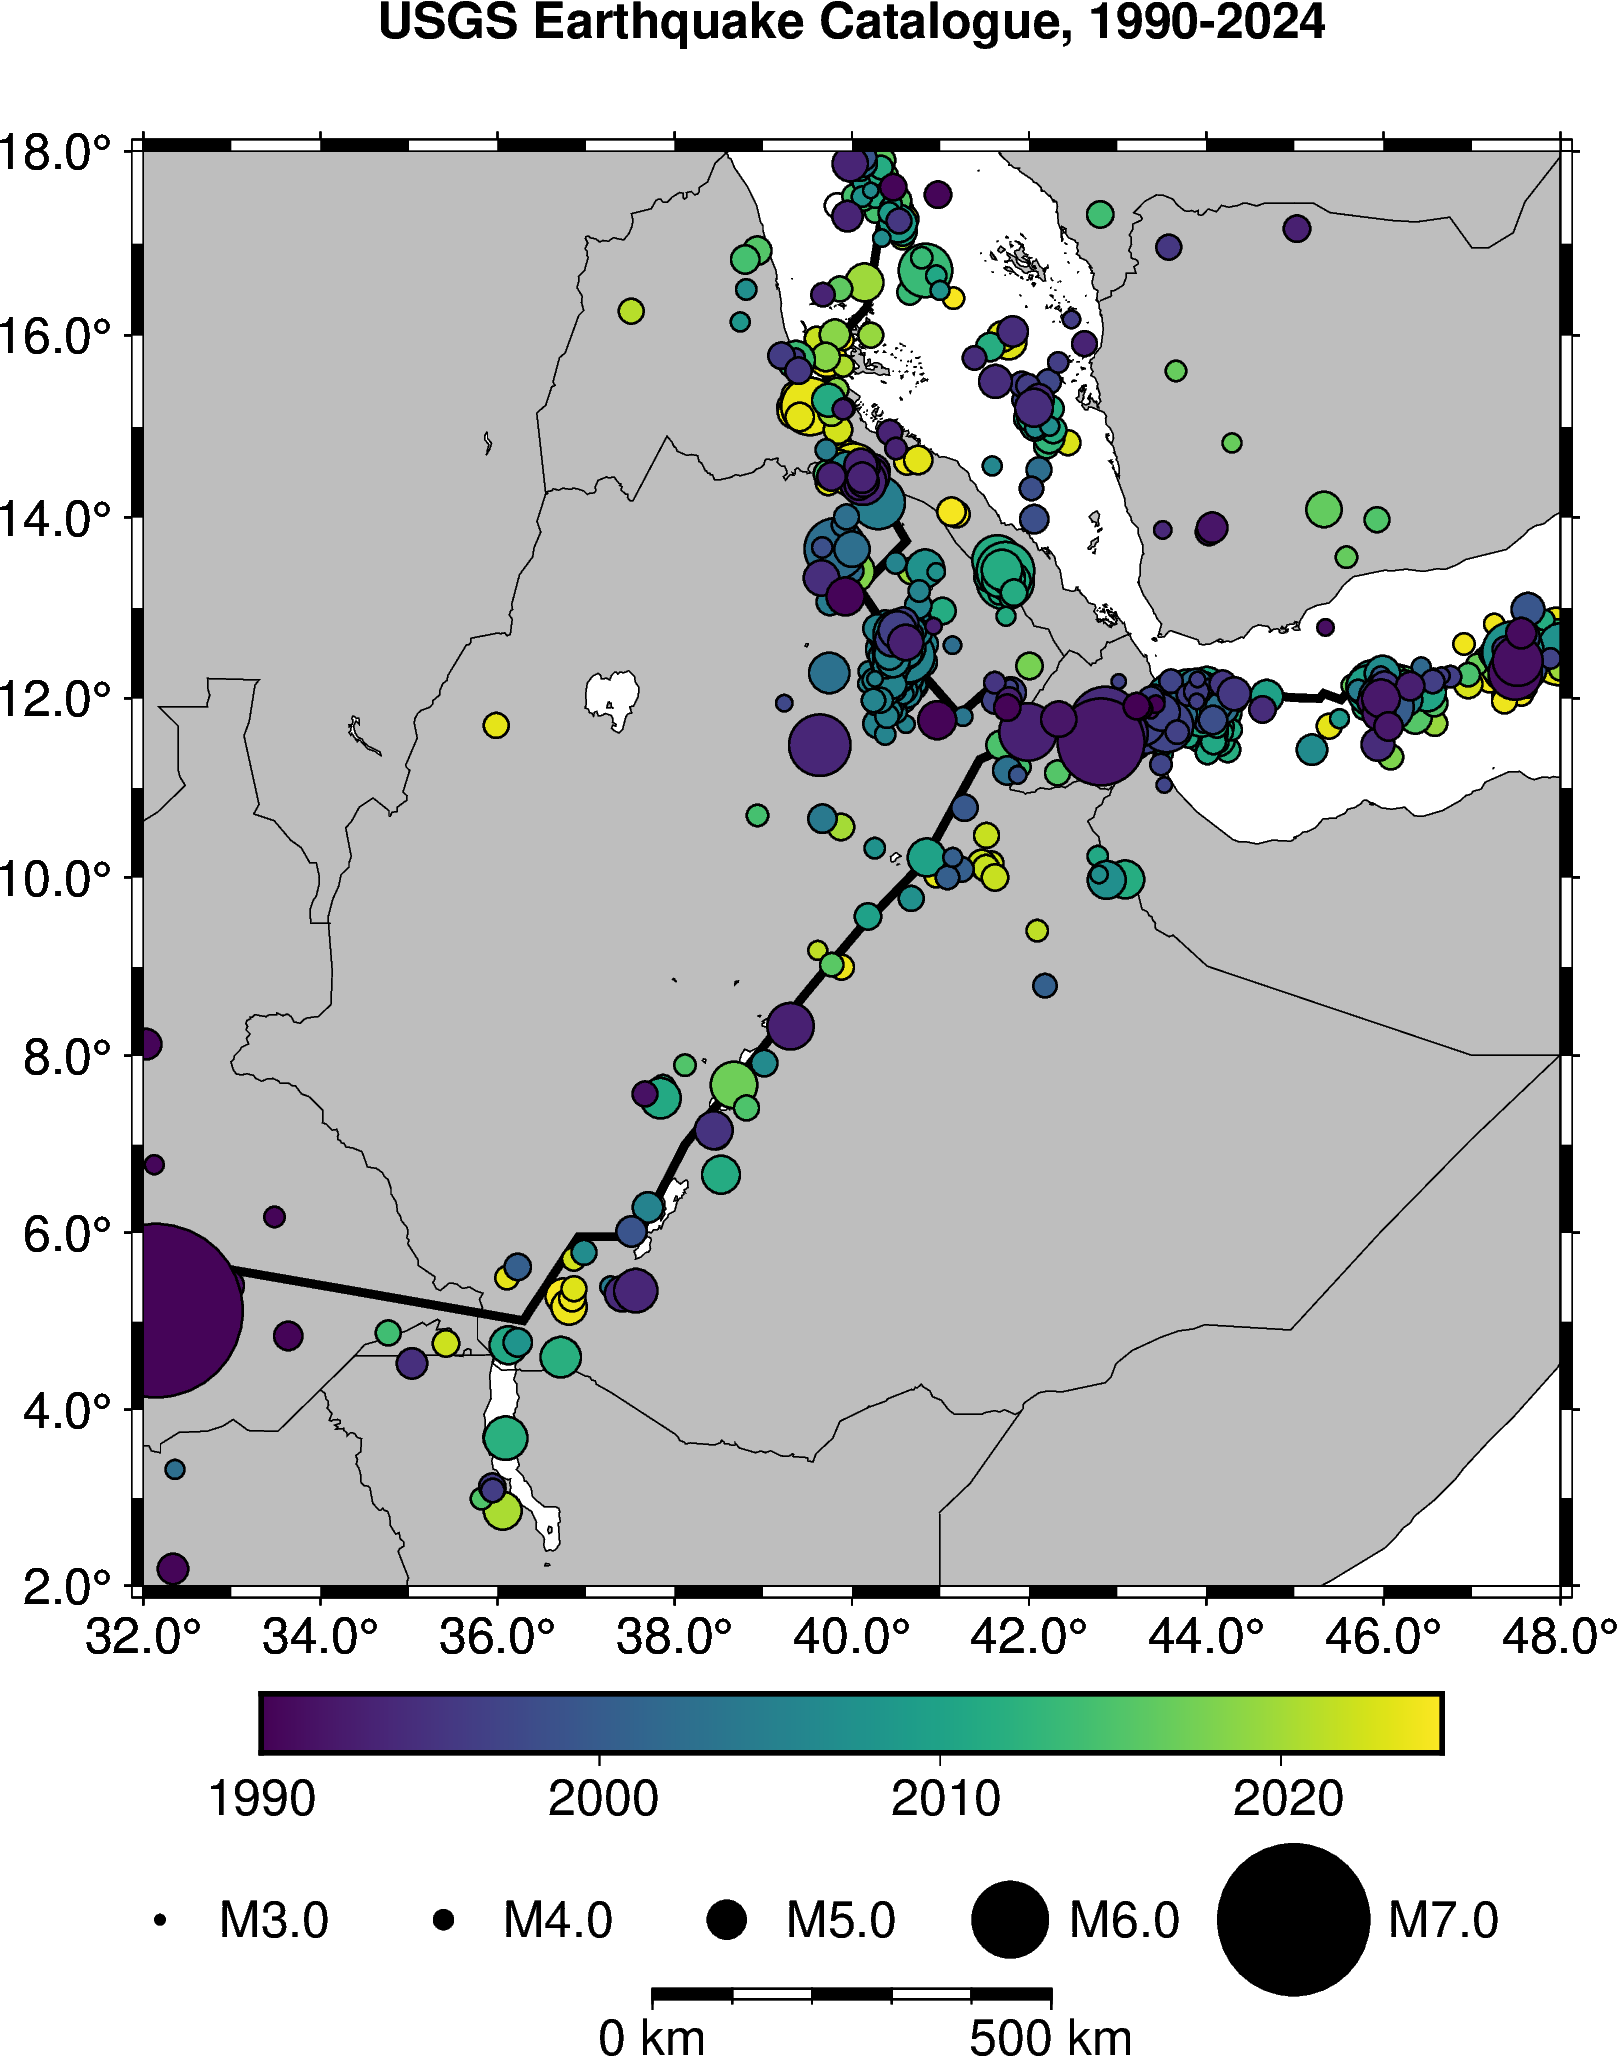

In [61]:
# Add to our params we are defining at the top of the script
# Here we will write our own legend specfile
scale = 0.01
mag_scale = [3, 4, 5, 6, 7]
ncols = len(mag_scale)

legend_fname = './legend_v2.txt'
lfile = open(legend_fname, 'w')
lfile.write('N '+str(ncols)+'\n')
for mag in mag_scale:
    label = 'M'+str(float(mag))
    size = str(scale*(2**mag))+'c'
    lfile.write('S 0.0c c '+size+' black 0.5p 0.5c '+label+'\n')
lfile.close()
    
#Initiate figure
fig = pygmt.Figure()

# Set some plot configuration things
pygmt.config(FONT_ANNOT_PRIMARY="12p", FONT_TITLE='12p')
pygmt.config(FORMAT_GEO_MAP="ddd.x")#, MAP_FRAME_TYPE="plain")

# First draw the solid colors
fig.coast(region=[lonmin,lonmax,latmin,latmax], projection=proj, frame=frame, land="gray", water="white", shorelines=True, borders=1)  

# Add Bird (2003) plate boundaries
bird_data = "./Data/bird_symbols.txt"
fig.plot(data=bird_data, pen='2p, black, -', projection=proj, region=[lonmin,lonmax,latmin,latmax])

# Plot EQ locs
pygmt.makecpt(cmap="viridis", series=[eq_data['datetime_numeric'].min(), eq_data['datetime_numeric'].max(), "1d"])
fig.plot(x=eq_data.longitude, y=eq_data.latitude, style='cc', size=scale*(2**eq_data.mag), pen='0.5p,black', cmap=True, fill=eq_data['datetime_numeric'], projection=proj)

# Set basemap to add title and scale
fig.basemap(region=[lonmin,lonmax,latmin,latmax], projection=proj, frame=[frame, title], map_scale='6.0/-3.5c+w500k+f+u')

# Add a colorbar below the plot, format it as datetime
fig.colorbar(
    frame=["a365000000f3650"],
    position="JBC+w10c/0.5c+h",  # Position: centered below map, horizontal colorbar, 10 cm wide
    scale=1
)

# Now we know we have ticks every 10 years, manually add labels
fig.text(text='1990', x=1.0, y=-1.8, no_clip=True, region=[0,12,0,12], frame=None)
fig.text(text='2000', x=3.9, y=-1.8, no_clip=True, region=[0,12,0,12], frame=None)
fig.text(text='2010', x=6.8, y=-1.8, no_clip=True, region=[0,12,0,12], frame=None)
fig.text(text='2020', x=9.7, y=-1.8, no_clip=True, region=[0,12,0,12], frame=None) 

# Add legend - specify the starting position x/y, and the width of the legend +w12 centimetres
fig.legend(spec='legend.txt', position='0.0c/-3.2c+w12c')

# Show the figure
fig.show()




### PyGMT Datasets

PyGMT has some functions to access readily available data, including sea floor crustal age maps and magnetic anomaly maps - the full list is [here](https://www.pygmt.org/dev/api/index.html#datasets). We are going to use `load_earth_relief` to create a simple topographic map. Global topographic data can be downloaded in resolutions from 1 degree to 1 arc second. Topographic data is read in as a grid file, and plotted using `grdimage`. Just like with the earthquake locations, we can define a colour pallette using `makecpt`, from the minimum to maximum elevation found in the grid, and using a generic GMT colour palette (see [here](https://docs.generic-mapping-tools.org/6.5/reference/cpts.html#built-in-color-palette-tables-cpt). You can change these to suit your geography or preference. A note [here](https://www.fabiocrameri.ch/colourmaps/) on perceptually uniform colour palettes.  

basemap [WARNING]: Your -L option was interpreted to mean -Lx


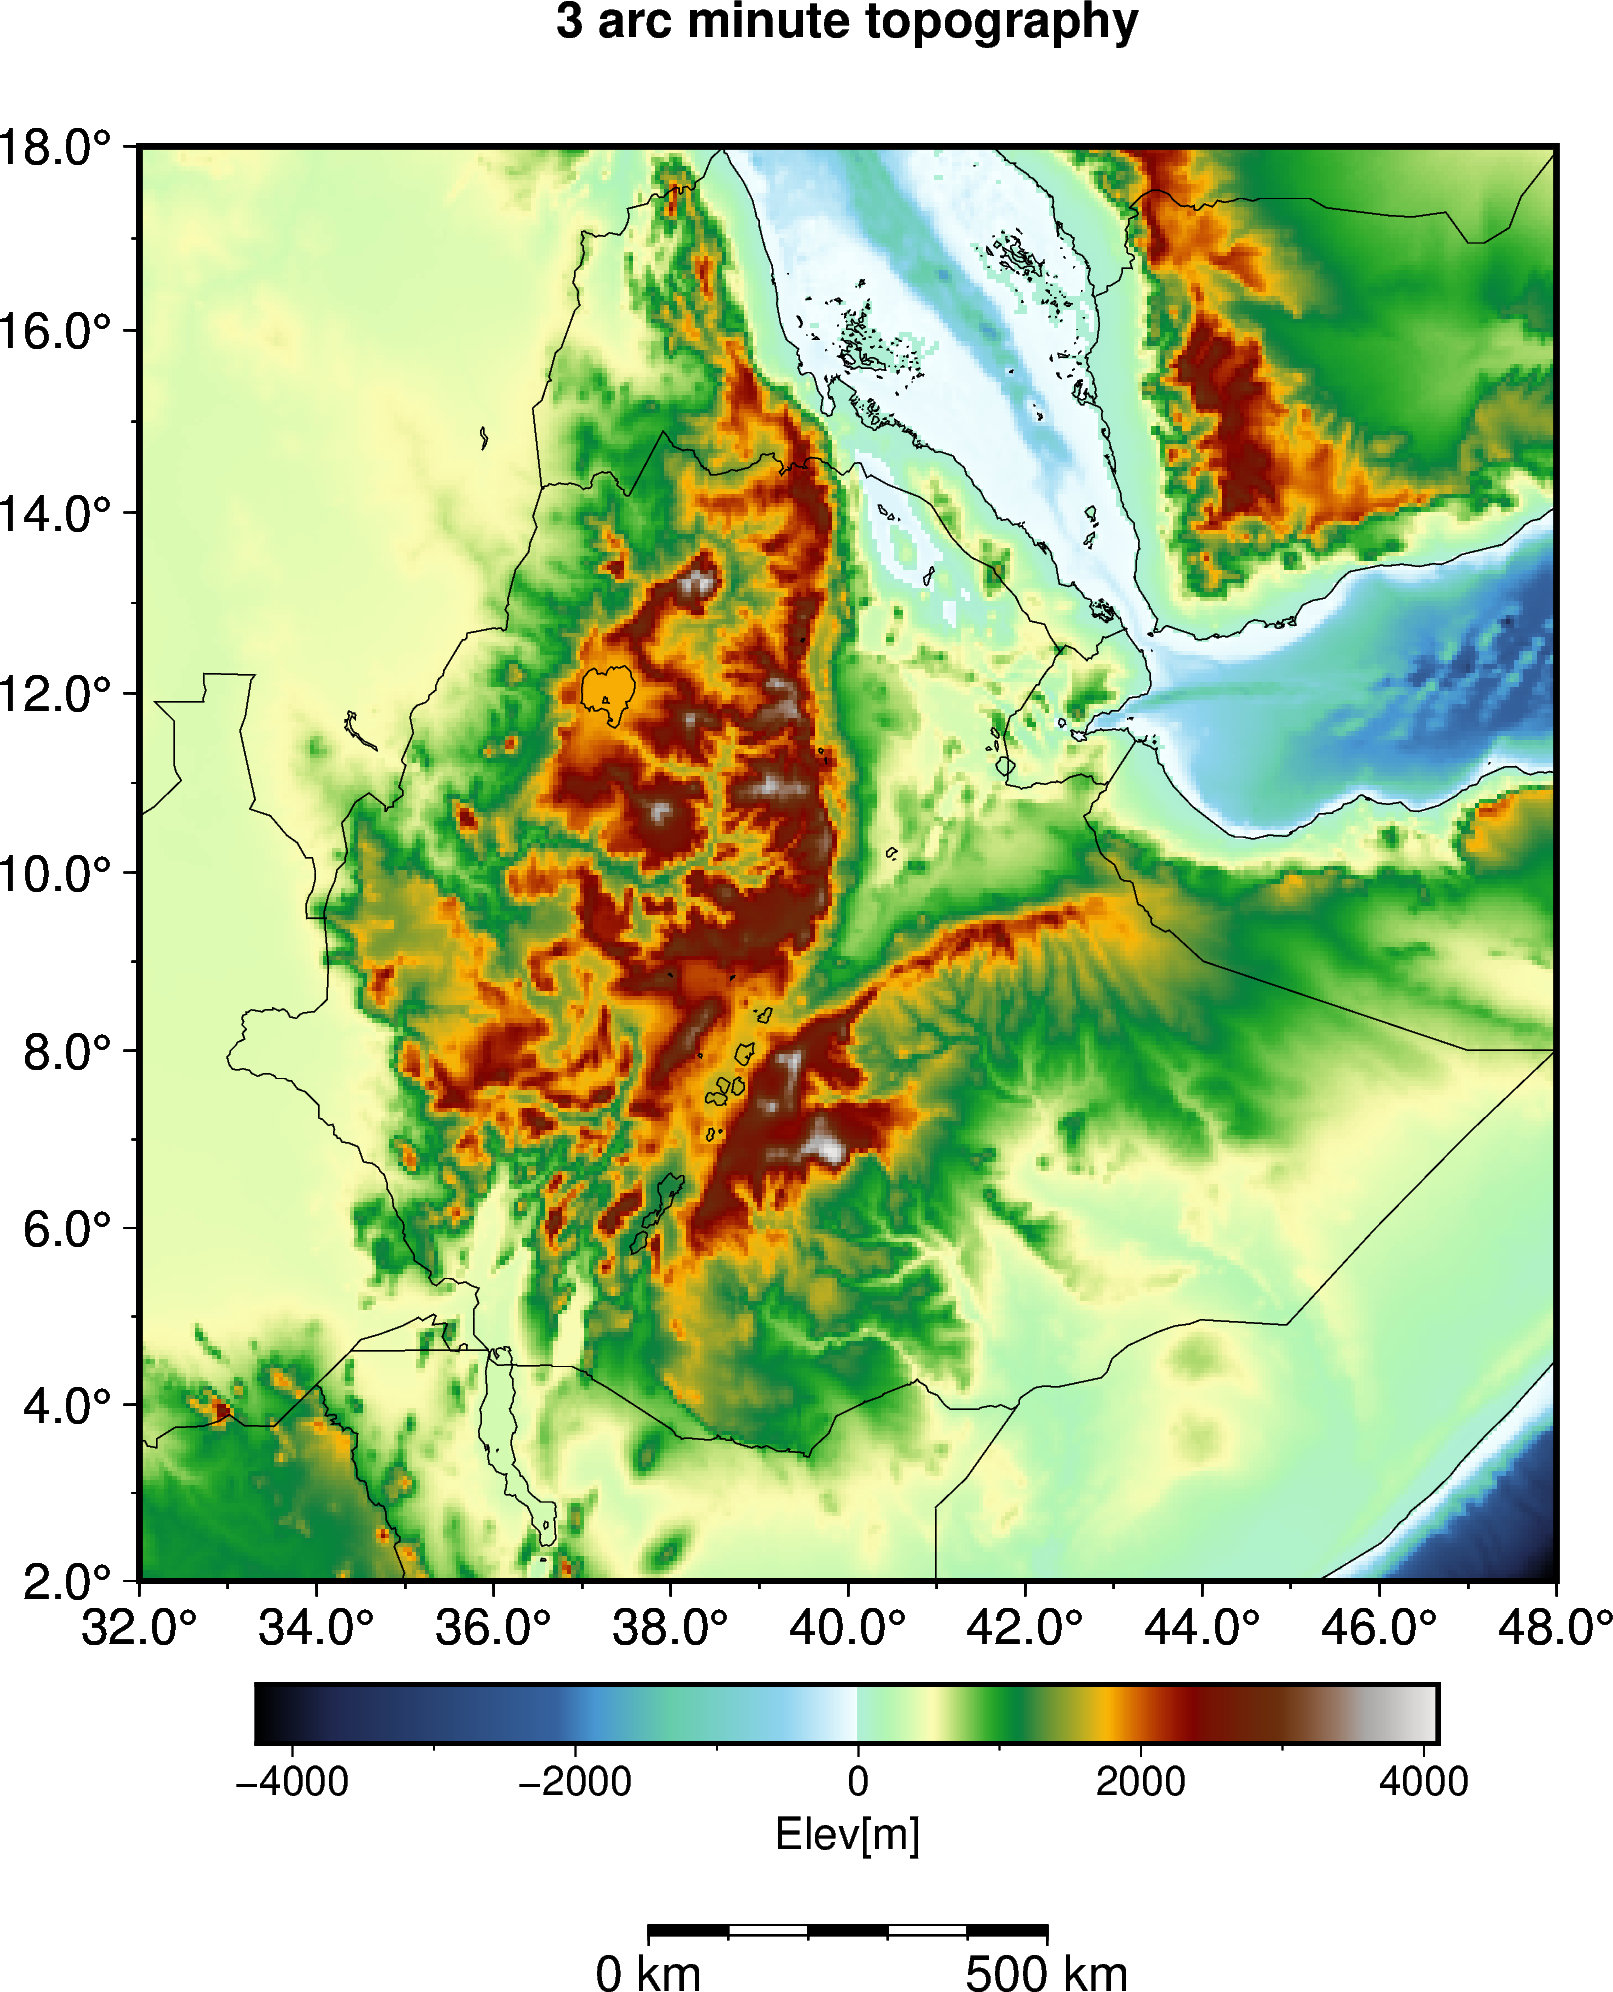

In [63]:
titlestr = "3 arc minute topography"
title = "+t\""+titlestr+"\""

#Initiate figure
fig = pygmt.Figure()

# Set some plot configuration things
pygmt.config(FONT_ANNOT_PRIMARY="12p", FONT_TITLE='12p')
pygmt.config(FORMAT_GEO_MAP="ddd.x") 
pygmt.config(MAP_FRAME_TYPE="plain")

grid = pygmt.datasets.load_earth_relief(resolution ="03m", region=[lonmin,lonmax,latmin,latmax])
cmap1 = pygmt.makecpt(cmap="earth", series=[float(grid.min()), float(grid.max()), 10])
fig.grdimage(grid=grid, projection=proj, cmap=cmap1)

# First draw the coast lines
fig.coast(region=[lonmin,lonmax,latmin,latmax], projection=proj, frame=frame, shorelines=True, borders=1)  # remove the land/water colour fill now showing topography 

fig.colorbar( frame=["x+lElev[m]"],position="JBC+w10c/0.5c+h",scale=1)

# Set basemap to add title and horizontal scale bar
fig.basemap(region=[lonmin,lonmax,latmin,latmax], projection=proj, frame=[frame, title], map_scale='6.0/-3.0c+w500k+f+u')

fig.show()

To add some depth to the figure, we can illuminate the topography. To do this we can calculate the gradient change between points, using `grdgradient` and define where our light source is that 'shines' over our topographic map. In this case, we have a light source at a 270 degree azimuth, with a 30 degree angle of declination. 

basemap [WARNING]: Your -L option was interpreted to mean -Lx


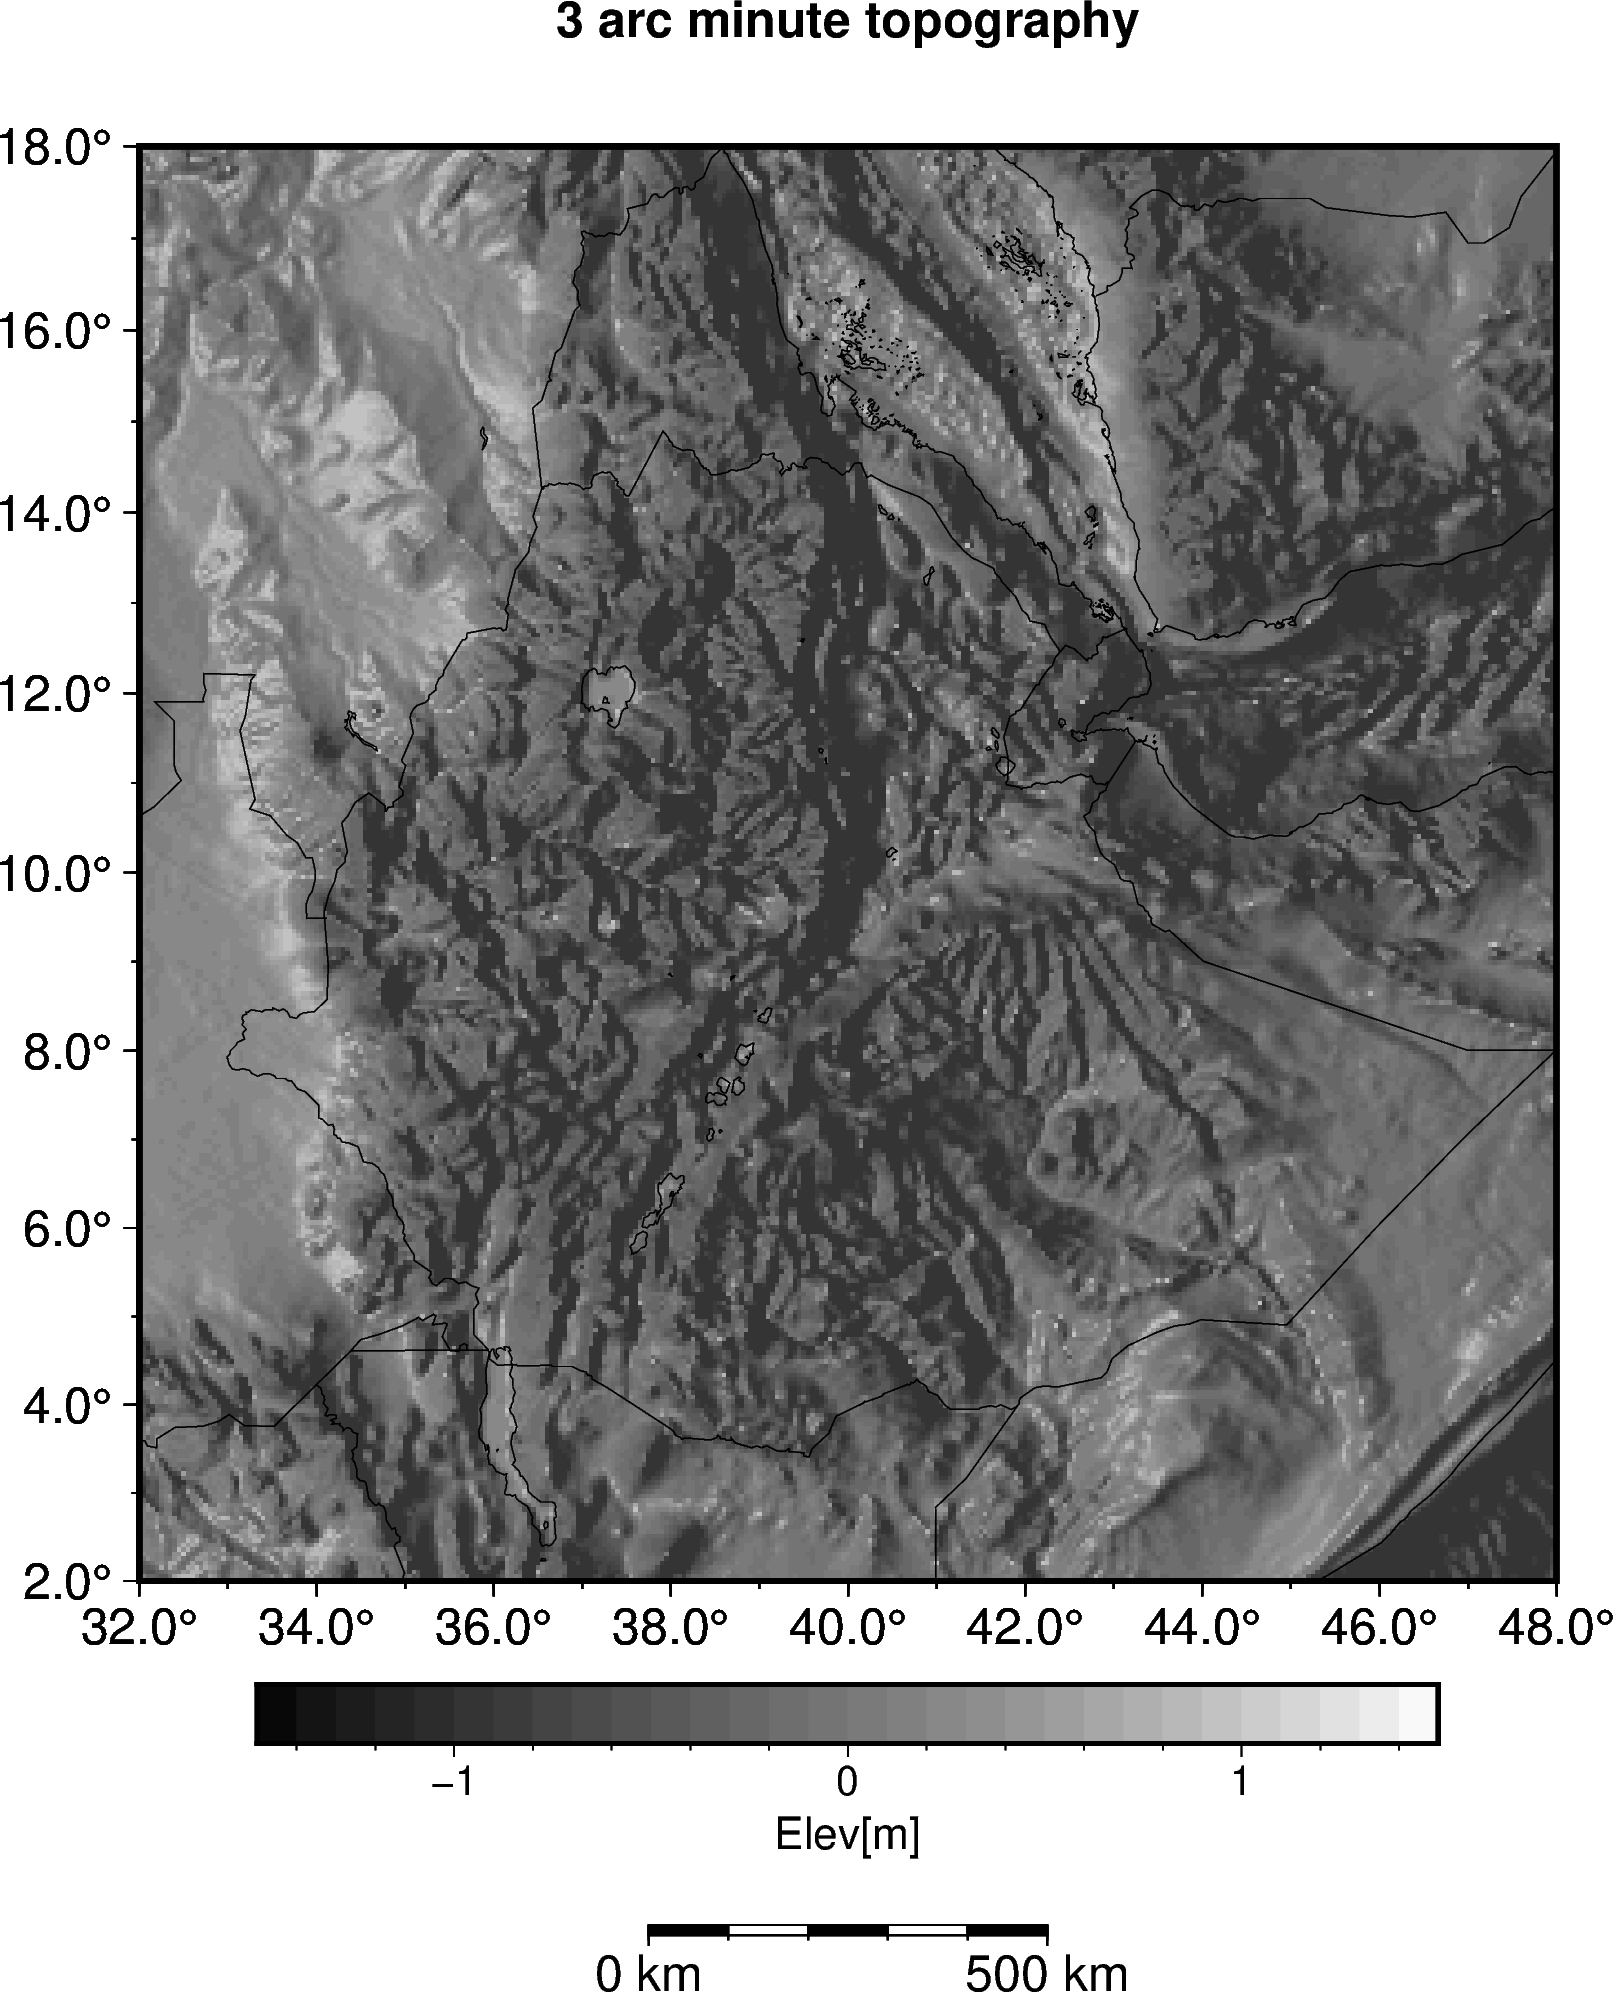

In [64]:
titlestr = "3 arc minute topography"
title = "+t\""+titlestr+"\""

#Initiate figure
fig = pygmt.Figure()

# Set some plot configuration things
pygmt.config(FONT_ANNOT_PRIMARY="12p", FONT_TITLE='12p')
pygmt.config(FORMAT_GEO_MAP="ddd.x") 
pygmt.config(MAP_FRAME_TYPE="plain")

# Calculate the grid differential 
grid = pygmt.datasets.load_earth_relief(resolution ="03m", region=[lonmin,lonmax,latmin,latmax])
dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 30])
cmap2 = pygmt.makecpt(cmap="grayC", series=[-1.5,1.5,0.1]) # make a new color palette, this time in gray to highlight the gradient grid. Play around with the upper and lower limits
fig.grdimage(grid=dgrid, projection=proj, cmap=cmap2)

# First draw the coast lines
fig.coast(region=[lonmin,lonmax,latmin,latmax], projection=proj, frame=frame, shorelines=True, borders=1)  # remove the land/water colour fill now showing topography 

fig.colorbar(frame=["x+lElev[m]"],position="JBC+w10c/0.5c+h",scale=1)

# Set basemap to add title and horizontal scale bar
fig.basemap(region=[lonmin,lonmax,latmin,latmax], projection=proj, frame=[frame, title], map_scale='6.0/-3.0c+w500k+f+u')

fig.show()

The colour bar is a bit meaningless now, as it reflects gradient changes rather than absolute elevation. But you can see how the illumination adds detail and depth to highlight topographic features and structures. We can layer grids using `grdimage` and use transparency arguments to see both the illumination and colour plotted on top of one another. 



basemap [WARNING]: Your -L option was interpreted to mean -Lx


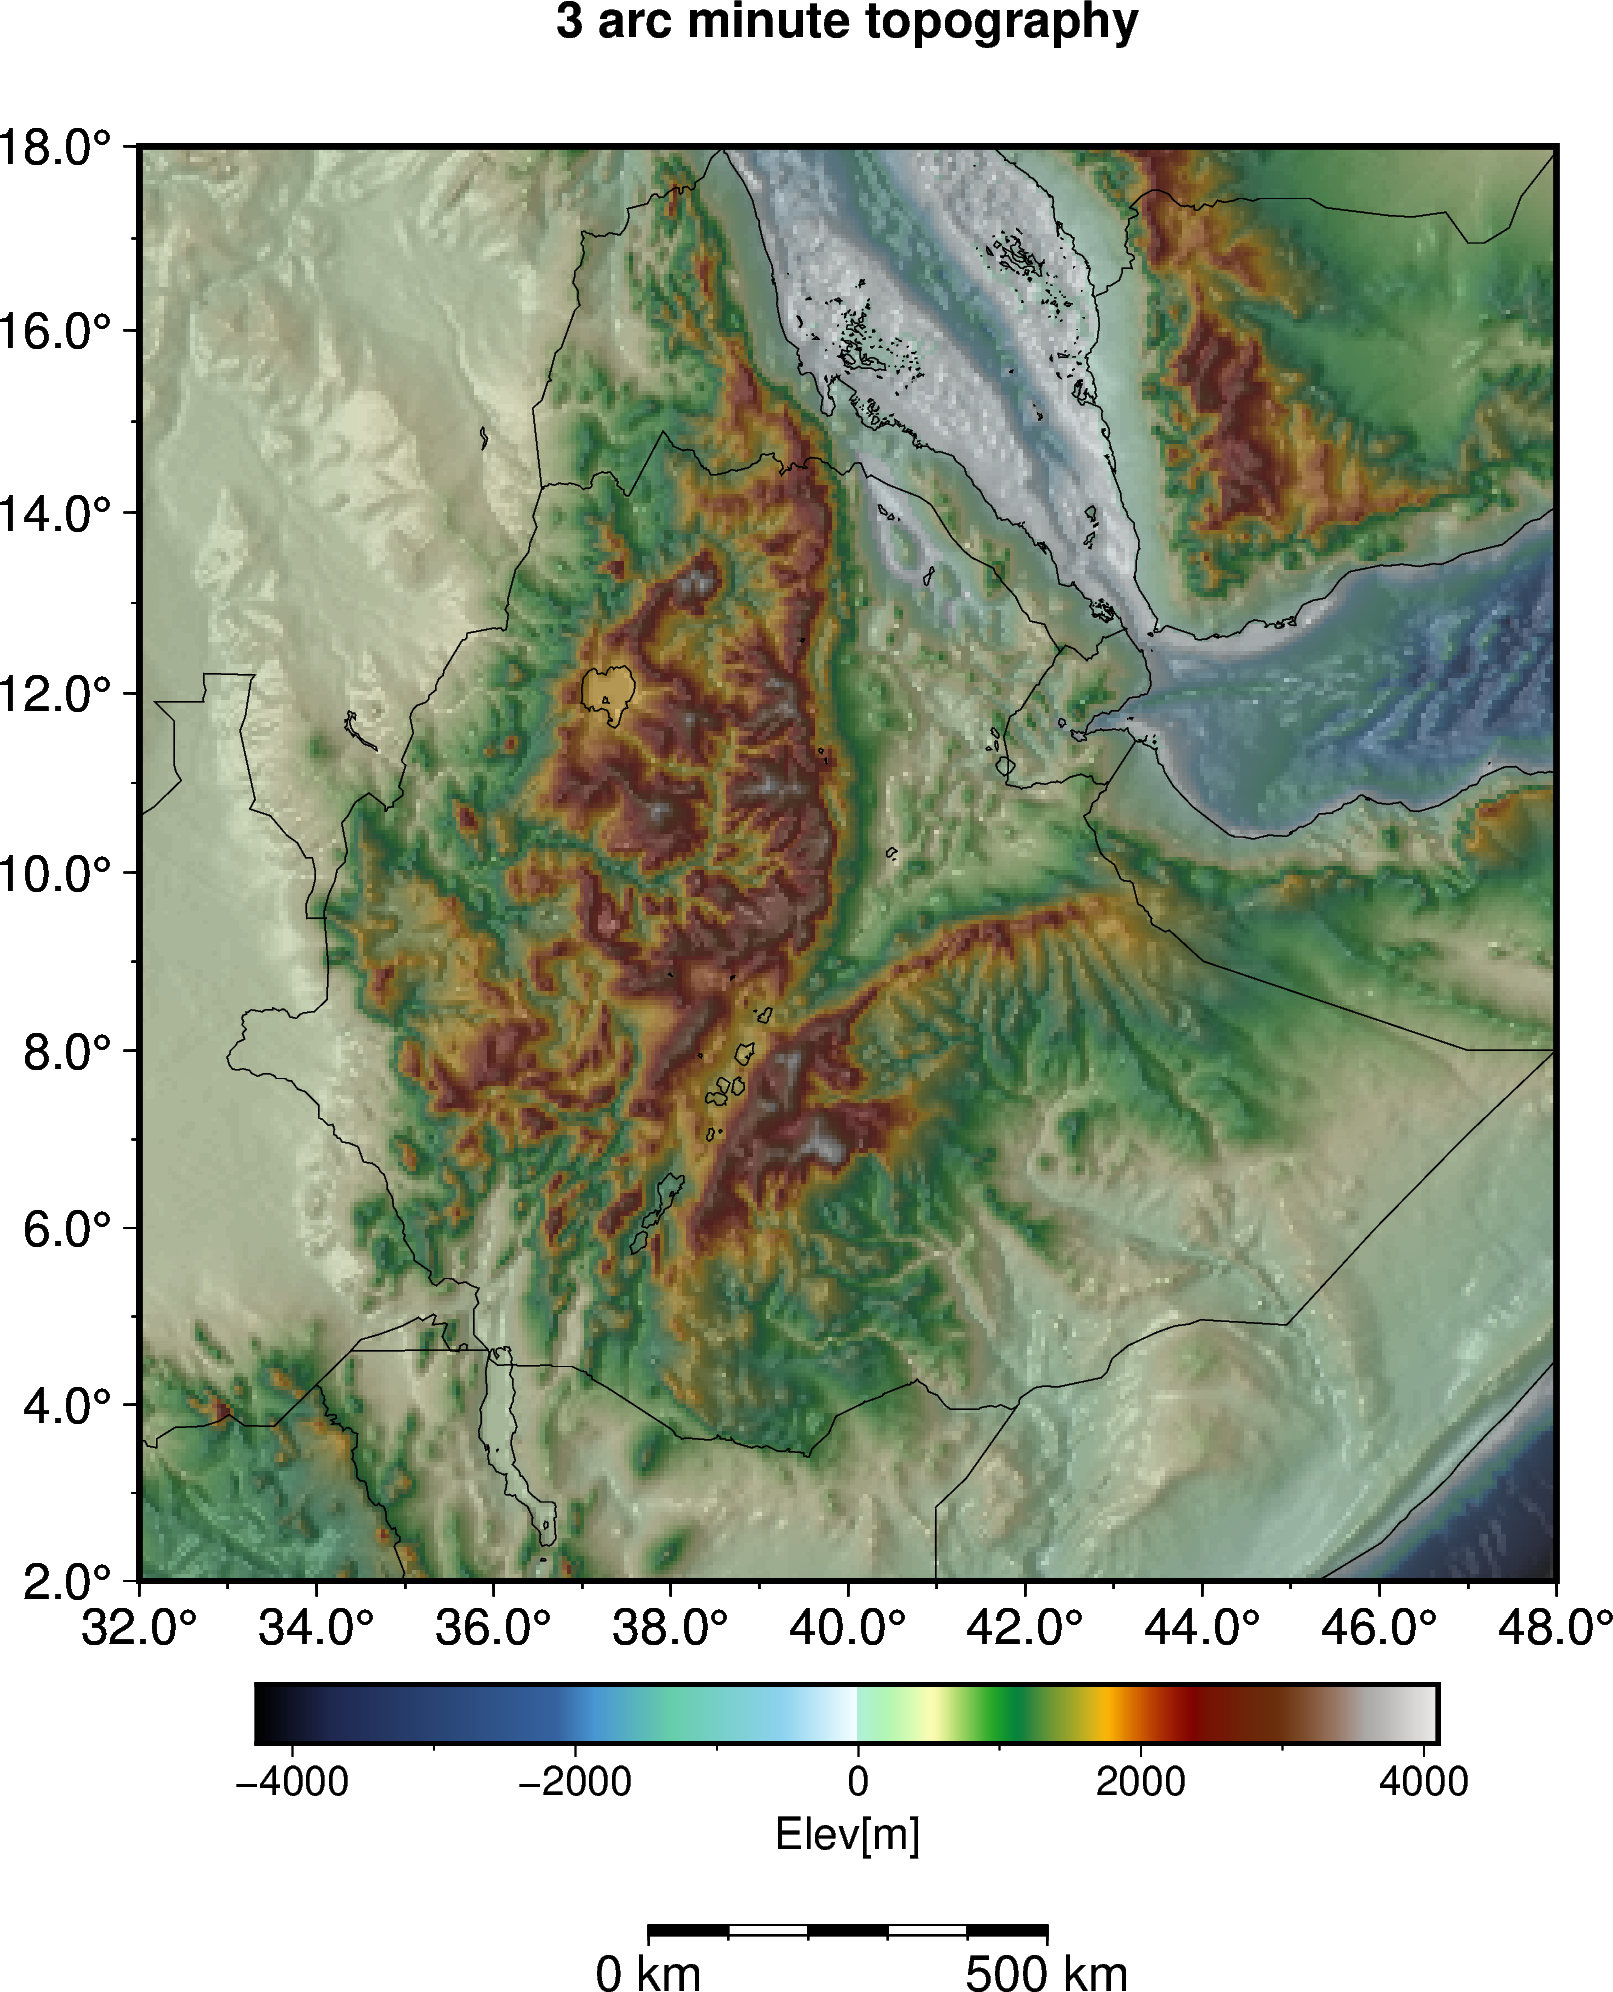

In [65]:
titlestr = "3 arc minute topography"
title = "+t\""+titlestr+"\""

#Initiate figure
fig = pygmt.Figure()

# Set some plot configuration things
pygmt.config(FONT_ANNOT_PRIMARY="12p", FONT_TITLE='12p')
pygmt.config(FORMAT_GEO_MAP="ddd.x") 
pygmt.config(MAP_FRAME_TYPE="plain")

# Calculate the grid differential 
grid = pygmt.datasets.load_earth_relief(resolution ="03m", region=[lonmin,lonmax,latmin,latmax])
dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 30])
cmap2 = pygmt.makecpt(cmap="grayC", series=[-1.5,1.5,0.1]) # make a new color palette, this time in gray to highlight the gradient grid. Play around with the upper and lower limits
fig.grdimage(grid=dgrid, projection=proj, cmap=cmap2)

# Plot coloured grid elevation on top with 60% transparency 
cmap1 = pygmt.makecpt(cmap="earth", series=[float(grid.min()), float(grid.max()), 10])
fig.grdimage(grid=grid, projection=proj, cmap=cmap1, transparency=60)

# First draw the coast lines
fig.coast(region=[lonmin,lonmax,latmin,latmax], projection=proj, frame=frame, shorelines=True, borders=1)  # remove the land/water colour fill now showing topography 

fig.colorbar(frame=["x+lElev[m]"],position="JBC+w10c/0.5c+h",scale=1)

# Set basemap to add title and horizontal scale bar
fig.basemap(region=[lonmin,lonmax,latmin,latmax], projection=proj, frame=[frame, title], map_scale='6.0/-3.0c+w500k+f+u')

fig.show()